# Importing Libraries

In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis


## Hey there! Let's Explore the Iris Dataset

Hi! I'm diving into the **Iris dataset** today. This dataset is kinda famous in the machine learning world, and I wanna see what’s inside.

- First, I'm using `pandas` to read the CSV file.
- Then, I'll peek at the first 10 rows to get a feel of what we're workin' with.


In [208]:
# Readin the dataset from a csv file
df = pd.read_csv('IRIS.csv')

# Jus looking at the first 10 rows,
df.head(10)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


### Let's Take a Quick Look at Our Dataset!

Okay, now I wanna know **what kind of data** we’re working with!  
I'll use `df.info()` to see:
- How many **rows** and **columns** we got.
- What **data types** are in each column.
- If there are any **missing values**.


In [209]:
#Now i am checking the dataset Structure
df.info()  # This tells me rows, columns, types,

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Checking for Null & Duplicated Values

In [210]:
df.isnull().sum() # for checking Null values i am using is Null

# Using duplicated function to explore the duplicate entries
df.duplicated().sum()

3

In [211]:
df.drop_duplicates(inplace=True)

## Exploring Statistical Information

Now, I want to get a quick summary of the dataset. Using `describe()`, I can check some key statistics.

In [212]:
# Checking basic statistics of the dataset
df.describe().T  # Transposing it to make it easier to read


,count,mean,std,min,25%,50%,75%,max
sepal_length,147.0,5.856463,0.829100,4.3,5.1,5.8,6.4,7.9
sepal_width,147.0,3.055782,0.437009,2.0,2.8,3.0,3.3,4.4
petal_length,147.0,3.780272,1.759111,1.0,1.6,4.4,5.1,6.9
petal_width,147.0,1.208844,0.757874,0.1,0.3,1.3,1.8,2.5


### Selecting Numerical Columns

To work with numerical data separately, I need to extract only the columns that contain numbers.


In [213]:
# Selecting only the numerical columns from the dataset
numerical_df = df.select_dtypes(include=['int', 'float'])

# Getting the names of those numerical columns
numerical_columns = numerical_df.columns

### Calculating Basic Statistics  

Now, I want to compute some key statistical measures for each numerical column in the dataset.  
Here’s what I am calculating:  

- **Mean**
- **Median**
- **Standard Deviation**
- **Skewness**  
- **Kurtosis**

In [214]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew

def compute_statistics(numerical_df):
    """Returns a DataFrame with key statistics (mean, median, std, skewness, kurtosis) for numerical data."""
    statistics = {
        'Mean': numerical_df.mean(),
        'Median': numerical_df.median(),
        'Standard Deviation': numerical_df.std(),
        'Skewness': numerical_df.apply(skew),
        'Kurtosis': numerical_df.apply(kurtosis)
    }
    return pd.DataFrame(statistics)

In [215]:
stats_df = compute_statistics(numerical_df)
print(stats_df)

                  Mean  Median  Standard Deviation  Skewness  Kurtosis
sepal_length  5.856463     5.8            0.829100  0.289566 -0.578732
sepal_width   3.055782     3.0            0.437009  0.321031  0.197982
petal_length  3.780272     4.4            1.759111 -0.290757 -1.368695
petal_width   1.208844     1.3            0.757874 -0.112317 -1.313904


### Box Plot Visualization for Each Feature  

I want to explore how the different **features of flowers** vary across species.  
A **box plot** helps me in identifying:  

- **The distribution** of values for each feature.  
- **The median**, **quartiles**, and **outliers** in the data.  
- **How different species compare** for each feature.  




<ipython-input-216-abd30535e54c>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="species", y=y, data=df, palette=custom_palette)
<ipython-input-216-abd30535e54c>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="species", y=y, data=df, palette=custom_palette)
<ipython-input-216-abd30535e54c>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="species", y=y, data=df, palette=custom_palette)
<ipython-input-216-abd30535e54c>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Ass

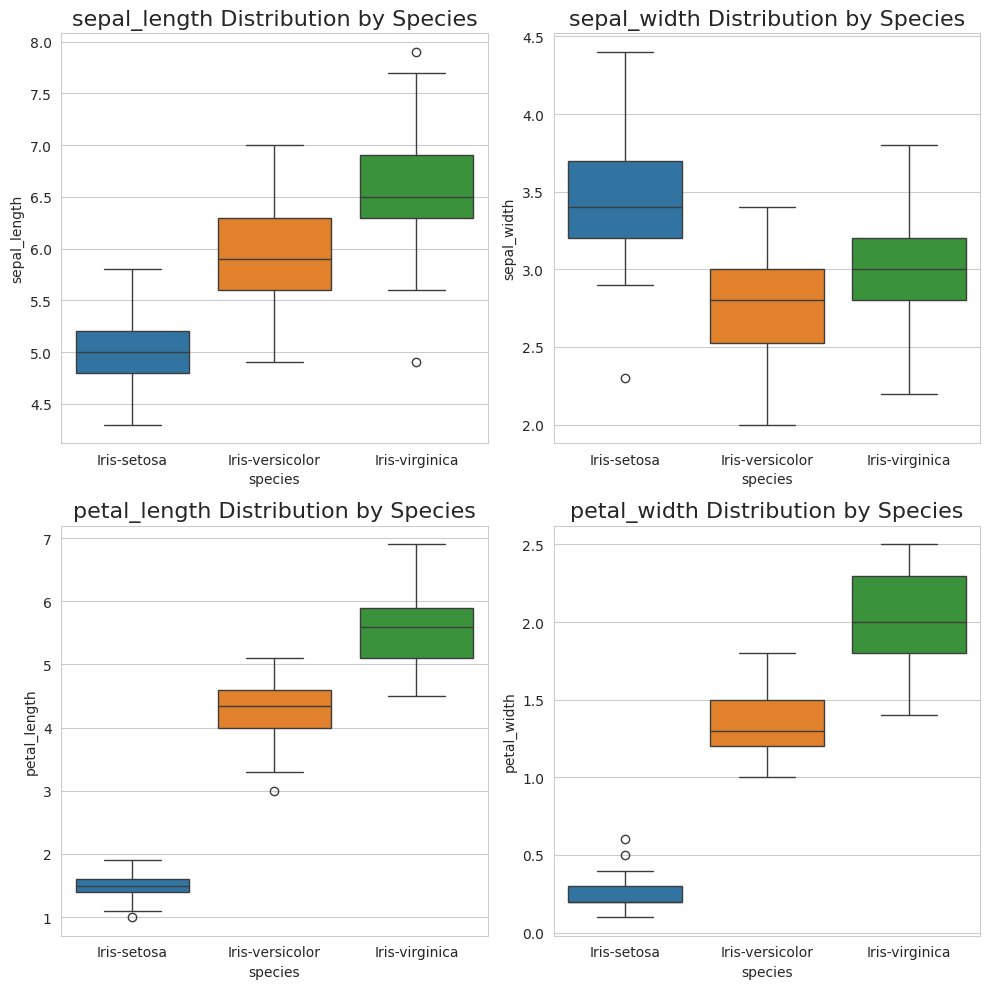

In [216]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to create a box plot with custom colors
def boxPlot(y):
    """
    This function creates a box plot for a given feature with custom colors for different species.

    """
    custom_palette = ["#1f77b4", "#ff7f0e", "#2ca02c"]  # Blue, Orange, Green for species
    sns.boxplot(x="species", y=y, data=df, palette=custom_palette)

# Setting figure size
plt.figure(figsize=(10, 10))

# Looping through numerical columns and creating subplots
for i, column in enumerate(df.columns[:-1]):  # Excluding 'species'
    plt.subplot(2, 2, i + 1)
    boxPlot(column)
    plt.title(f'{column} Distribution by Species', fontsize=16)

# Adjusting layout and showing the plots
plt.tight_layout()
plt.show()


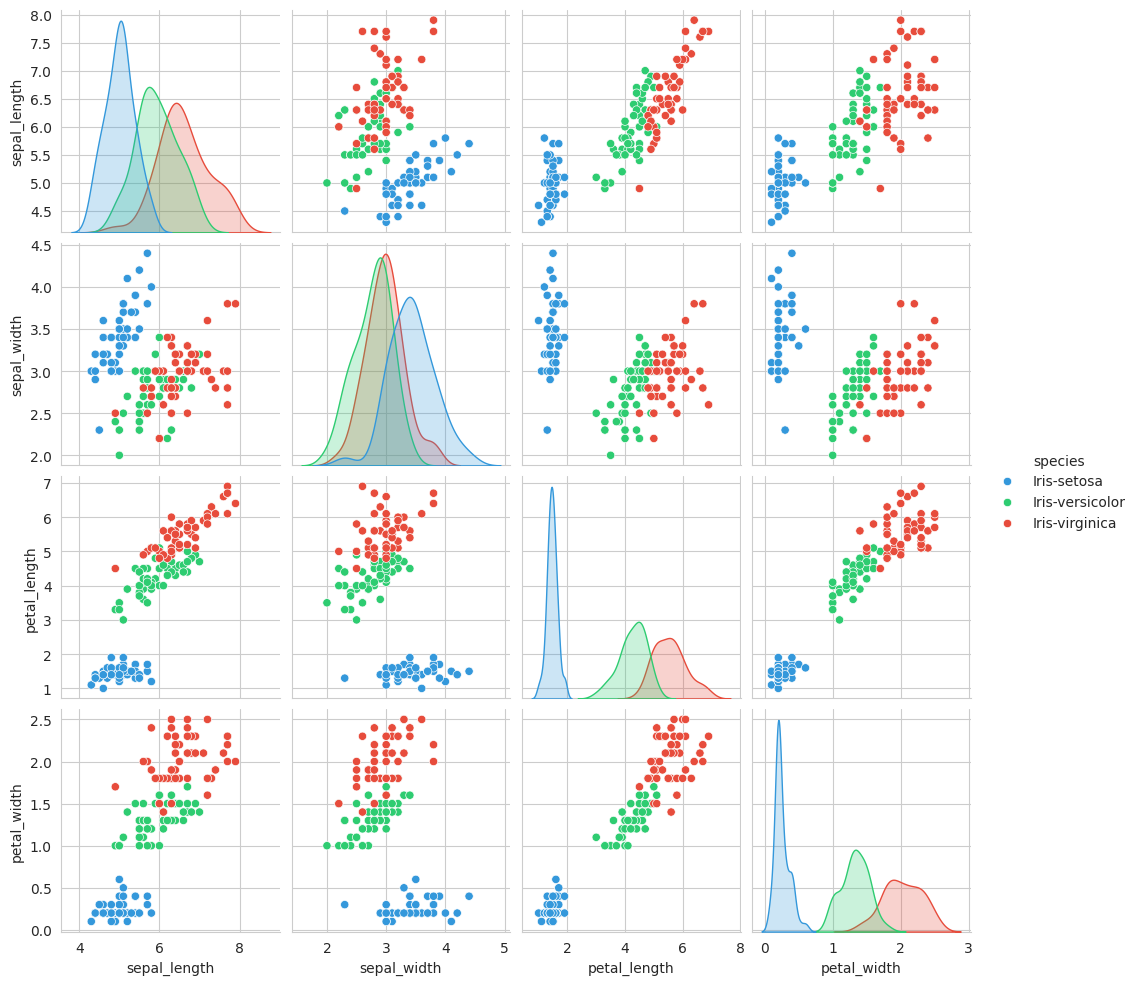

In [217]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pair plot to visualize feature relationships
sns.pairplot(df, hue='species', palette=['#3498db', '#2ecc71', '#e74c3c'])  # Blue, Green, Red for species

# Saving the plot as an image file
plt.savefig('pairplot.jpg')

# Showing the plot
plt.show()


### Count Plot for Categorical Data  

Now, I want to **visualize the count distribution** of categorical variables.  

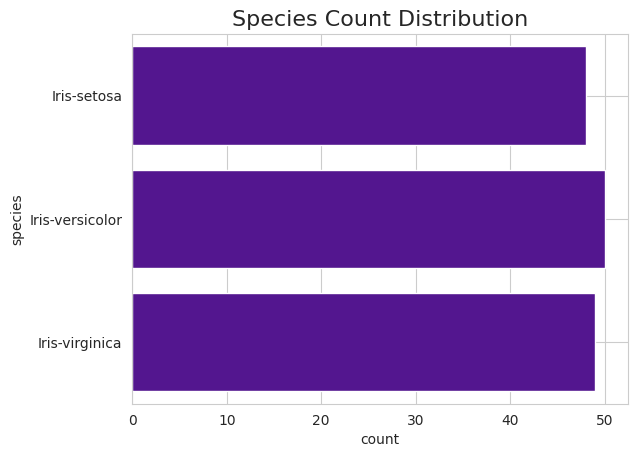

<Figure size 640x480 with 0 Axes>

In [218]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to create a count plot
def count_plot(y, title, font_size=12):
    ''' Function takes a categorical column and plots a count plot '''

    # Defininh custom colors
    sns.set_palette("plasma")  # Blue, Green, Red

    # Creatinh the count plot
    sns.countplot(y=y, data=df)

    # Adding title and formatting
    plt.title(title, fontsize=font_size)
    plt.grid(True)

    # Showing and save the plot
    plt.show()
    plt.savefig('countplot.png')

# Example usage (assuming 'species' is a categorical column in df)
count_plot(df['species'], "Species Count Distribution", font_size=16)


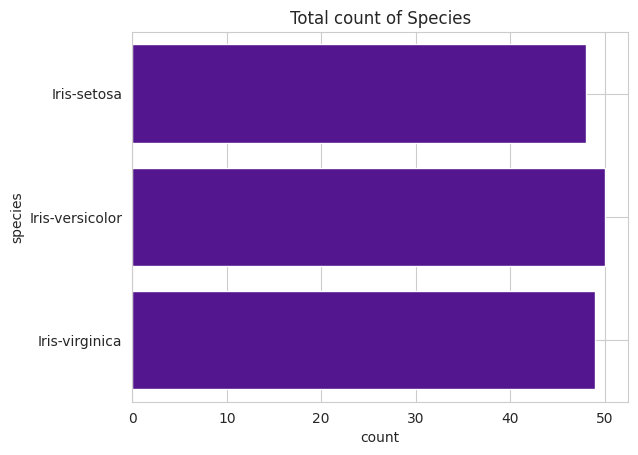

<Figure size 640x480 with 0 Axes>

In [219]:
count_plot(df['species'], 'Total count of Species')

### Label Encoding

In [220]:
categorical_df = df.select_dtypes(include=['object', 'category']) # Extracting categorical columns for label encoding
categorical_columns = categorical_df.columns

In [221]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
encoded_df = df.copy()

for col in categorical_columns:
    encoded_df[col] = label_encoder.fit_transform(df[col])

# Correlation:

In [222]:
corr = encoded_df.corr() # Now i am finding correlation between features using corr( ) functions
corr

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109321,0.871305,0.817058,0.782904
sepal_width,-0.109321,1.000000,-0.421057,-0.356376,-0.418348
petal_length,0.871305,-0.421057,1.000000,0.961883,0.948339
petal_width,0.817058,-0.356376,0.961883,1.000000,0.955693
species,0.782904,-0.418348,0.948339,0.955693,1.000000


### Correlation Heatmap  

Now, I want to **analyze relationships** between different features in the dataset.

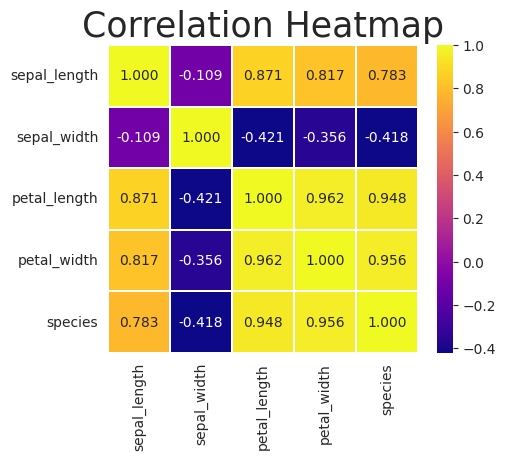

<Figure size 640x480 with 0 Axes>

In [223]:
import seaborn as sns
import matplotlib.pyplot as plt


correlation_matrix = encoded_df.corr()

plt.figure(figsize=(5, 4))

sns.heatmap(correlation_matrix, annot=True, cmap='plasma', fmt=".3f", linewidths=0.2)

plt.title('Correlation Heatmap', fontsize=25)
plt.show()

# Saving the heatmap as an image file
plt.savefig('correlation heatmap.png')


In [224]:
features = df.drop('species', axis=1)

# Scaling:

In [225]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Initializing the scaler
scaler = StandardScaler()

# Applying scaling to the feature set
df_scaled = scaler.fit_transform(features)

# Displaying the transformed dataset
df_scaled


array([[-0.91550949,  1.0199714 , -1.35773692, -1.33570001],
       [-1.15755966, -0.12808217, -1.35773692, -1.33570001],
       [-1.39960983,  0.33113926, -1.41477817, -1.33570001],
       [-1.52063491,  0.10152855, -1.30069567, -1.33570001],
       [-1.03653457,  1.24958212, -1.35773692, -1.33570001],
       [-0.55243423,  1.93841426, -1.18661318, -1.07090176],
       [-1.52063491,  0.79036069, -1.35773692, -1.20330089],
       [-1.03653457,  0.79036069, -1.30069567, -1.33570001],
       [-1.76268509, -0.35769288, -1.35773692, -1.33570001],
       [-1.15755966,  0.10152855, -1.30069567, -1.46809914],
       [-0.55243423,  1.47919283, -1.30069567, -1.33570001],
       [-1.27858474,  0.79036069, -1.24365442, -1.33570001],
       [-1.27858474, -0.12808217, -1.35773692, -1.46809914],
       [-1.88371017, -0.12808217, -1.52886066, -1.46809914],
       [-0.06833389,  2.16802498, -1.47181942, -1.33570001],
       [-0.18935898,  3.08646783, -1.30069567, -1.07090176],
       [-0.55243423,  1.

### Finding the Optimal Number of Clusters (Elbow Method)

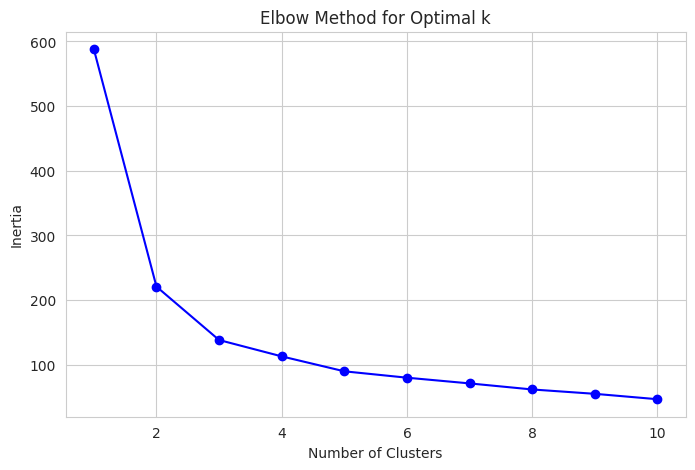

In [226]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Listing to store inertia values for different numbers of clusters
inertia_values = []

# Looping through different values of k (number of clusters)
for k in range(1, 11):
    # Initializing KMeans with current value of k
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=500, n_init=10, random_state=0)

    # Fiting KMeans to the scaled dataset and store the inertia
    kmeans.fit(df_scaled)
    inertia_values.append(kmeans.inertia_)

# Ploting the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia_values, marker='o', linestyle='-', color='b')

# Labeling the axes and title
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')

# Showing the plot
plt.show()


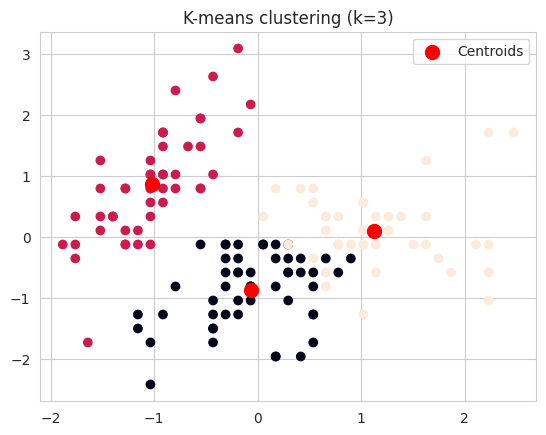

In [227]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=500, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(df_scaled)
inertia_values.append(kmeans.inertia_)

plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=y_kmeans)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', label='Centroids')
plt.title('K-means clustering (k={})'.format(3))
plt.legend()
plt.show()


# Now i will do Prediciting Petal Length by Sepal Lenght

# Line Fitting:

In [228]:
X_feature = df[['sepal_length']]
y_feature = encoded_df[['petal_length']]

In [229]:
x = scaler.fit_transform(X_feature)
y = scaler.fit_transform(y_feature)

# Now its time to implement Linear Regression with SkLearn

In [230]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Independent variables as a DataFrame
XY = pd.DataFrame(x)

# Dependent variable
Z = y

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(XY, Z, test_size=0.2, random_state=42)

# Initializing and train the Linear Regression model
mlr = LinearRegression()
mlr.fit(X_train, y_train)

# Printing the coefficients
print(mlr.coef_)

# Extracting coefficient (β1) and intercept (α)
β1 = mlr.coef_[0][0]
α = mlr.intercept_

# Printing the intercept
print(α)


[[0.88884447]]
[-0.02591541]


In [231]:
from scipy import stats as st
import numpy as np

params = np.append(mlr.coef_, mlr.intercept_)
predictions = mlr.predict(X_test)
sum_sq_residuals = np.sum((y_test - predictions) ** 2)
dof = len(y_train) - len(params)
mse = sum_sq_residuals / dof

X_train['Constant'] = 1
cov = mse * np.diagonal(np.linalg.inv(X_train.T @ X_train))
se = np.sqrt(cov)
t_statistics = params / se
tails = 2
p_values = [tails * (1 - st.t.cdf(np.abs(t), dof)) for t in t_statistics]
alpha = 0.05
t = st.t.ppf(1 - (alpha / tails), dof)
d = t * se
upper_ci, lower_ci = params + d, params - d


In [232]:
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 200)

# Display the results
output = [params, se, t_statistics, np.array(p_values), lower_ci, upper_ci]
index = ['Value', 'Standard Error', 't-Statistic', 'p-Value', 'Lower CI', 'Upper CI']
output = pd.DataFrame(output, index=index, columns=list(X_train)).round(3)
output = output.T
print(output)

          Value  Standard Error  t-Statistic  p-Value  Lower CI  Upper CI
0         0.889           0.025       35.337    0.000     0.839     0.939
Constant -0.026           0.025       -1.039    0.301    -0.075     0.024


### Confidence Interval Plot with Regression Line

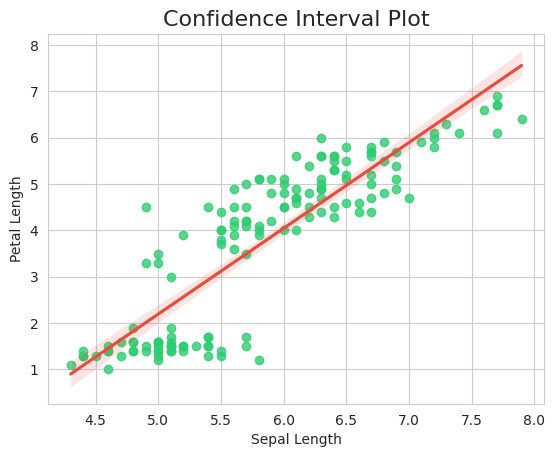

In [233]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

sns.regplot(
    x='sepal_length',
    y='petal_length',
    data=df,
    scatter_kws={'color': '#2ecc71'},  # Green scatter points
    line_kws={'color': '#e74c3c'}  # Red regression line
)

# Adding title and labels
plt.title('Confidence Interval Plot', fontsize=16)
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')

# Showing the plot
plt.show()


### Training a Linear Regression Model and Visualizing the Results

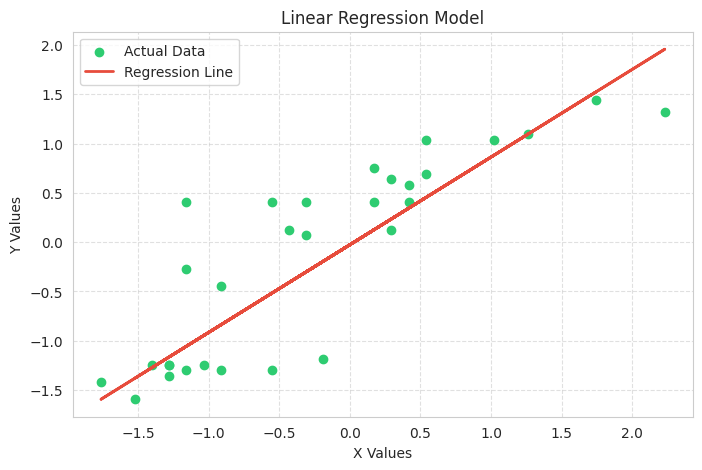

In [234]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def train_and_visualize_linear_regression(x, y):
    """
    Trains a Linear Regression model, visualizes the results, and returns the trained model.
    """
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    plt.figure(figsize=(8, 5))
    plt.scatter(X_test, y_test, color='#2ecc71', label='Actual Data')
    plt.plot(X_test, y_pred, color='#e74c3c', linewidth=2, label='Regression Line')
    plt.xlabel('X Values')
    plt.ylabel('Y Values')
    plt.title('Linear Regression Model')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

    return model

# Assuming 'x' and 'y' are your data
trained_model = train_and_visualize_linear_regression(x, y)